<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ingest" data-toc-modified-id="Ingest-1">Ingest</a></span></li><li><span><a href="#Inspect-and-Clean" data-toc-modified-id="Inspect-and-Clean-2">Inspect and Clean</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Looking-for-duplicates" data-toc-modified-id="Looking-for-duplicates-2.0.1">Looking for duplicates</a></span></li><li><span><a href="#Change-datatypes" data-toc-modified-id="Change-datatypes-2.0.2">Change datatypes</a></span></li><li><span><a href="#Change-column-names" data-toc-modified-id="Change-column-names-2.0.3">Change column names</a></span></li><li><span><a href="#Manage-missing-data" data-toc-modified-id="Manage-missing-data-2.0.4">Manage missing data</a></span></li><li><span><a href="#Imputing-missing-values" data-toc-modified-id="Imputing-missing-values-2.0.5">Imputing missing values</a></span></li></ul></li><li><span><a href="#Check-categorical-data" data-toc-modified-id="Check-categorical-data-2.1">Check categorical data</a></span><ul class="toc-item"><li><span><a href="#Using-visuals-to-get-a-sense-of-the-data" data-toc-modified-id="Using-visuals-to-get-a-sense-of-the-data-2.1.1">Using visuals to get a sense of the data</a></span><ul class="toc-item"><li><span><a href="#Categorical-data" data-toc-modified-id="Categorical-data-2.1.1.1">Categorical data</a></span></li></ul></li><li><span><a href="#Examine-categorical-data-a-little-more-closely" data-toc-modified-id="Examine-categorical-data-a-little-more-closely-2.1.2">Examine categorical data a little more closely</a></span></li><li><span><a href="#Dropping-columns-and-rows" data-toc-modified-id="Dropping-columns-and-rows-2.1.3">Dropping columns and rows</a></span><ul class="toc-item"><li><span><a href="#Quantitative-data" data-toc-modified-id="Quantitative-data-2.1.3.1">Quantitative data</a></span></li></ul></li><li><span><a href="#Removing-outliers" data-toc-modified-id="Removing-outliers-2.1.4">Removing outliers</a></span></li></ul></li></ul></li><li><span><a href="#Exercise---30-minutes" data-toc-modified-id="Exercise---30-minutes-3">Exercise - 30 minutes</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#See-Beer-Notebook---Part-1" data-toc-modified-id="See-Beer-Notebook---Part-1-3.0.1">See Beer Notebook - Part 1</a></span></li></ul></li></ul></li></ul></div>

# Ingest

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from numpy.random import randn
import warnings

warnings.filterwarnings("ignore")

In [2]:
df_original = pd.read_csv('https://raw.githubusercontent.com/jimcody2014/python_data/refs/heads/main/diabetes_inspect.csv')
df_original.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glipizide,glyburide,tolbutamide,miglitol,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,xyz,?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,NaN,?,1,1,7,3,...,No,No,No,No,Up,No,No,No,Yes,>30
2,64410,86047875,AfricanAmerican,female,[20-30),?,1,1,7,2,...,Steady,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Mle,[30-40),?,1,1,7,2,...,No,No,No,No,Up,No,No,No,Yes,NO
4,16680,42519267,Caucasian,M,[40-50),?,1,1,7,1,...,Steady,No,No,No,Steady,No,No,No,Yes,NO


In [3]:
# A cursory look at the data
df_original.shape

(101767, 33)

In [4]:
df = df_original
df.shape

(101767, 33)

# Inspect and Clean

### Looking for duplicates

In [5]:
# checking for duplicates
df.loc[df.duplicated()]# This will drop all duplicate rows

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glipizide,glyburide,tolbutamide,miglitol,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,diabetesMed,readmitted
101766,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [6]:
df.drop_duplicates(keep = 'first', inplace = True) 

# keep - which duplicate to keep, default is none!

df.loc[df.duplicated()]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glipizide,glyburide,tolbutamide,miglitol,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,diabetesMed,readmitted


### Change datatypes

In [7]:
# Are we ok with the data types?
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101766 entries, 0 to 101765
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   encounter_id              101766 non-null  int64  
 1   patient_nbr               101766 non-null  int64  
 2   race                      101766 non-null  object 
 3   gender                    101766 non-null  object 
 4   age                       101765 non-null  object 
 5   weight                    101766 non-null  object 
 6   admission_type_id         101766 non-null  int64  
 7   discharge_disposition_id  101766 non-null  int64  
 8   admission_source_id       101766 non-null  int64  
 9   time_in_hospital          101766 non-null  int64  
 10  payer_code                101766 non-null  object 
 11  medical_specialty         101766 non-null  object 
 12  num_lab_procedures        101766 non-null  int64  
 13  num_procedures            101766 non-null  int64 

In [8]:
# Change data type

df['encounter_id'] = df['encounter_id'].astype(str)
df['patient_nbr'] = df['patient_nbr'].astype(str)
df['admission_type_id'] = df['admission_type_id'].astype(str)
df['discharge_disposition_id'] = df['discharge_disposition_id'].astype(str)
df['admission_source_id'] = df['admission_source_id'].astype(str)
df.info()

# vaccines['series_complete_pop_pct'] = pd.to_numeric(vaccines['series_complete_pop_pct']).astype(int)


<class 'pandas.core.frame.DataFrame'>
Index: 101766 entries, 0 to 101765
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   encounter_id              101766 non-null  object 
 1   patient_nbr               101766 non-null  object 
 2   race                      101766 non-null  object 
 3   gender                    101766 non-null  object 
 4   age                       101765 non-null  object 
 5   weight                    101766 non-null  object 
 6   admission_type_id         101766 non-null  object 
 7   discharge_disposition_id  101766 non-null  object 
 8   admission_source_id       101766 non-null  object 
 9   time_in_hospital          101766 non-null  int64  
 10  payer_code                101766 non-null  object 
 11  medical_specialty         101766 non-null  object 
 12  num_lab_procedures        101766 non-null  int64  
 13  num_procedures            101766 non-null  int64 

### The 'inplace' parameter

This is a decision about making a new object (and using more memory) or creating a new object that holds the modified data.

- inplace=True  - - changes the object (e.g., dataframe) you are working on (Example 1)
- inplace=False - - the change is discarded (Example 2) unless the change is written to a new object (Example 3)

In [9]:
# Example 1

data = {'Name': ['Alice', 'Bob', 'Charlie'], 'Age': [25, 30, 35]}
df9 = pd.DataFrame(data)

# Drop a column using inplace=True
df9.drop(columns=['Age'], inplace=True)
print('df9 with inplace = True', df9)

df9 with inplace = True       Name
0    Alice
1      Bob
2  Charlie


In [10]:
df9

,Name
0,Alice
1,Bob
2,Charlie


In [11]:
# Example 2 - change discarded

data = {'Name': ['Alice', 'Bob', 'Charlie'], 'Age': [25, 30, 35]}
df9 = pd.DataFrame(data)

# Drop a column using inplace=False
df9.drop(columns=['Age'], inplace=False)
print('df9 with inplace = False', df9)

df9 with inplace = False       Name  Age
0    Alice   25
1      Bob   30
2  Charlie   35


In [12]:
df9

,Name,Age
0,Alice,25
1,Bob,30
2,Charlie,35


In [13]:
# Example 3

data = {'Name': ['Alice', 'Bob', 'Charlie'], 'Age': [25, 30, 35]}
df9 = pd.DataFrame(data)

# Drop a column using inplace=False
new_df9 = df9.drop(columns=['Age'], inplace=False)
print('original', df9)
print('new', new_df9)




original       Name  Age
0    Alice   25
1      Bob   30
2  Charlie   35
new       Name
0    Alice
1      Bob
2  Charlie


### Use inplace=False + Reassignment
- Readability: It makes it clear that the method creates and returns a new object.
- Chaining Operations: You can chain multiple methods together (e.g., df = df.method1().method2()).
- Debugging: The original object remains intact unless explicitly reassigned, making debugging easier.

### Advantages and Caution:
Advantages:
- Using inplace=True can save memory because it avoids creating a new object.
Caution:
- When you use inplace=True, you lose the ability to chain methods since no object is returned.
- Overusing inplace=True can make debugging more difficult because the original object is modified directly, which might lead to unexpected results.
  
**In modern practices, many developers prefer not to use inplace=True for better code readability and to maintain immutability where possible.**

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna



### Change column names

In [14]:
# Rename a few columns

short_names = {'admission_type_id':'admin_type', # creating a dict of the names to be changed
               'discharge_disposition_id':'discharge_dispo',
               'admission_source_id':'admin_source',
               'num_lab_procedures':'lab_procedures',
               'num_procedures':'procedures'}

df.rename(columns=short_names, inplace=True) # passing the dict to the rename method
 

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101766 entries, 0 to 101765
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   encounter_id              101766 non-null  object 
 1   patient_nbr               101766 non-null  object 
 2   race                      101766 non-null  object 
 3   gender                    101766 non-null  object 
 4   age                       101765 non-null  object 
 5   weight                    101766 non-null  object 
 6   admin_type                101766 non-null  object 
 7   discharge_dispo           101766 non-null  object 
 8   admin_source              101766 non-null  object 
 9   time_in_hospital          101766 non-null  int64  
 10  payer_code                101766 non-null  object 
 11  medical_specialty         101766 non-null  object 
 12  lab_procedures            101766 non-null  int64  
 13  procedures                101766 non-null  int64 

### Manage missing data

In [15]:
# Just listing the columns and how many rows 
# for each have a missing value.

df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             1
weight                          0
admin_type                      0
discharge_dispo                 0
admin_source                    0
time_in_hospital                0
payer_code                      0
medical_specialty               0
lab_procedures                  0
procedures                      0
num_medications                 9
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
glimepiride                     0
glipizide                       0
glyburide                       0
tolbutamide                     0
miglitol                        0
insulin                         0
glyburide-metformin             0
glipizide-metf

In [16]:
# Calculate the percentage of null values for each column
df_null = df.isna().mean().round(4) * 100

df_null

encounter_id                 0.00
patient_nbr                  0.00
race                         0.00
gender                       0.00
age                          0.00
weight                       0.00
admin_type                   0.00
discharge_dispo              0.00
admin_source                 0.00
time_in_hospital             0.00
payer_code                   0.00
medical_specialty            0.00
lab_procedures               0.00
procedures                   0.00
num_medications              0.01
number_outpatient            0.00
number_emergency             0.00
number_inpatient             0.00
diag_1                       0.00
max_glu_serum               94.75
A1Cresult                   83.28
metformin                    0.00
glimepiride                  0.00
glipizide                    0.00
glyburide                    0.00
tolbutamide                  0.00
miglitol                     0.00
insulin                      0.00
glyburide-metformin          0.00
glipizide-metf

In [17]:
df_null.sort_values(ascending=False).head()

max_glu_serum      94.75
A1Cresult          83.28
num_medications     0.01
encounter_id        0.00
glyburide           0.00
dtype: float64

<Axes: >

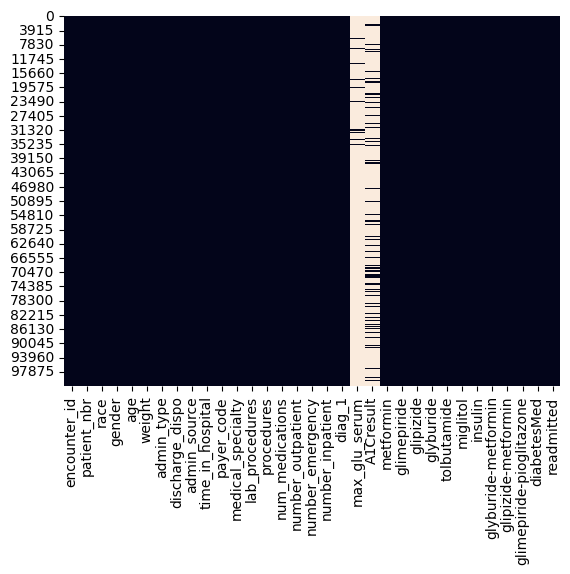

In [18]:
# Plotting missing values

sns.heatmap(df.isnull(), cbar=False)

### Imputing missing values

In [19]:
a = df['num_medications'].describe()
b = df['num_medications'].median()
c = df['num_medications'].mode()
print(a)
print()
print(f'The median is {b}')
print()
print(f'The mode is {c}')

count    101757.000000
mean         16.021964
std           8.127864
min           1.000000
25%          10.000000
50%          15.000000
75%          20.000000
max          81.000000
Name: num_medications, dtype: float64

The median is 15.0

The mode is 0    13.0
Name: num_medications, dtype: float64


In [20]:
# Fill missing values of num_medications with the average of num_medications (mean)

#df[ 'num_medications' ] = df.num_medications.fillna( df.num_medications.mean() )

df.num_medications.fillna( df.num_medications.mean(),inplace=True )

df_null = df.isna().mean().round(4) * 100
df_null.sort_values(ascending=False).head()

# Can be filled with an arbitrary number
# df.num_medications.fillna( 101,inplace=True )

# backward, forward ->  df.fillna(method='bfill') , df.fillna(method='ffill')

max_glu_serum       94.75
A1Cresult           83.28
encounter_id         0.00
number_inpatient     0.00
diabetesMed          0.00
dtype: float64

In [21]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admin_type,discharge_dispo,admin_source,time_in_hospital,...,glipizide,glyburide,tolbutamide,miglitol,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,xyz,?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,NaN,?,1,1,7,3,...,No,No,No,No,Up,No,No,No,Yes,>30
2,64410,86047875,AfricanAmerican,female,[20-30),?,1,1,7,2,...,Steady,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Mle,[30-40),?,1,1,7,2,...,No,No,No,No,Up,No,No,No,Yes,NO
4,16680,42519267,Caucasian,M,[40-50),?,1,1,7,1,...,Steady,No,No,No,Steady,No,No,No,Yes,NO


## Check categorical data

<Axes: xlabel='gender', ylabel='count'>

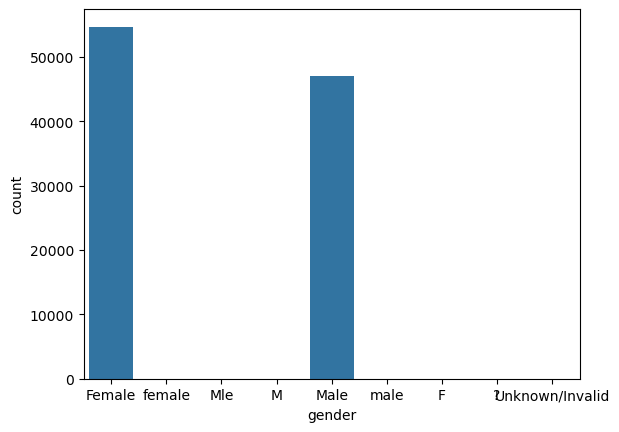

In [22]:
sns.countplot(x='gender', data=df)

In [23]:
df['gender'].nunique()

9

In [24]:
df['gender'].unique()

array(['Female', 'female', 'Mle', 'M', 'Male', 'male', 'F', '?',
       'Unknown/Invalid'], dtype=object)

In [25]:
df['gender'].value_counts()

gender
Female             54706
Male               47051
Unknown/Invalid        3
female                 1
Mle                    1
M                      1
male                   1
F                      1
?                      1
Name: count, dtype: int64

In [26]:

df['weight'] = df['weight'].replace('?', pd.NA)
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             1
weight                      98569
admin_type                      0
discharge_dispo                 0
admin_source                    0
time_in_hospital                0
payer_code                      0
medical_specialty               0
lab_procedures                  0
procedures                      0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
glimepiride                     0
glipizide                       0
glyburide                       0
tolbutamide                     0
miglitol                        0
insulin                         0
glyburide-metformin             0
glipizide-metf

In [27]:
df.loc[df.gender == 'M','gender']='Male'
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admin_type,discharge_dispo,admin_source,time_in_hospital,...,glipizide,glyburide,tolbutamide,miglitol,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,xyz,<NA>,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,NaN,<NA>,1,1,7,3,...,No,No,No,No,Up,No,No,No,Yes,>30
2,64410,86047875,AfricanAmerican,female,[20-30),<NA>,1,1,7,2,...,Steady,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Mle,[30-40),<NA>,1,1,7,2,...,No,No,No,No,Up,No,No,No,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),<NA>,1,1,7,1,...,Steady,No,No,No,Steady,No,No,No,Yes,NO


In [28]:
# Change/Fix some of the data values

df['gender'] = df['gender'].replace({'M':'Male', 'Mle':'Male', 'F':'Female'})
#df.head()

In [29]:
# Inconsistent capitalization
# Apply a function along an axis of the DataFrame.

df['gender'] = df['gender'].apply(lambda x:x.lower())
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admin_type,discharge_dispo,admin_source,time_in_hospital,...,glipizide,glyburide,tolbutamide,miglitol,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,diabetesMed,readmitted
0,2278392,8222157,Caucasian,female,xyz,<NA>,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,female,NaN,<NA>,1,1,7,3,...,No,No,No,No,Up,No,No,No,Yes,>30
2,64410,86047875,AfricanAmerican,female,[20-30),<NA>,1,1,7,2,...,Steady,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,male,[30-40),<NA>,1,1,7,2,...,No,No,No,No,Up,No,No,No,Yes,NO
4,16680,42519267,Caucasian,male,[40-50),<NA>,1,1,7,1,...,Steady,No,No,No,Steady,No,No,No,Yes,NO


<Axes: xlabel='gender', ylabel='count'>

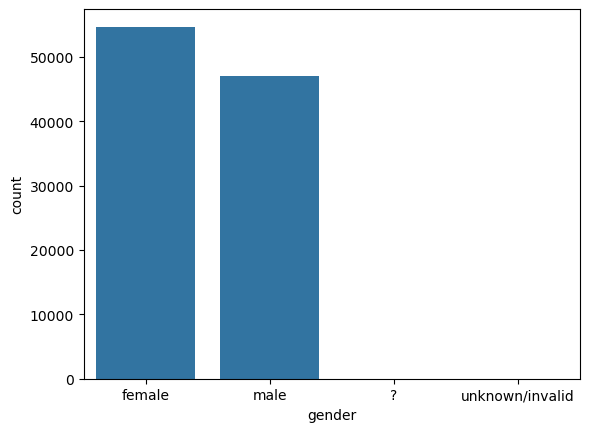

In [30]:
sns.countplot(x='gender', data=df)

In [31]:
x = df.loc[df.gender == 'unknown/invalid','gender']
y = df.loc[df.gender == '?','gender']
print(x)
print(y)

30506    unknown/invalid
75551    unknown/invalid
82573    unknown/invalid
Name: gender, dtype: object
11    ?
Name: gender, dtype: object


In [32]:
df.iloc[11]

encounter_id                          36900
patient_nbr                        77391171
race                        AfricanAmerican
gender                                    ?
age                                 [60-70)
weight                                 <NA>
admin_type                                2
discharge_dispo                           1
admin_source                              4
time_in_hospital                          7
payer_code                                ?
medical_specialty                         ?
lab_procedures                           62
procedures                                0
num_medications                        11.0
number_outpatient                         0
number_emergency                          0
number_inpatient                          0
diag_1                                  157
max_glu_serum                           NaN
A1Cresult                               NaN
metformin                                No
glimepiride                     

In [33]:
df['gender'] = df['gender'].replace({'?':'NaN', 'unknown/invalid':'male'})
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admin_type,discharge_dispo,admin_source,time_in_hospital,...,glipizide,glyburide,tolbutamide,miglitol,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,diabetesMed,readmitted
0,2278392,8222157,Caucasian,female,xyz,<NA>,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,female,NaN,<NA>,1,1,7,3,...,No,No,No,No,Up,No,No,No,Yes,>30
2,64410,86047875,AfricanAmerican,female,[20-30),<NA>,1,1,7,2,...,Steady,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,male,[30-40),<NA>,1,1,7,2,...,No,No,No,No,Up,No,No,No,Yes,NO
4,16680,42519267,Caucasian,male,[40-50),<NA>,1,1,7,1,...,Steady,No,No,No,Steady,No,No,No,Yes,NO


In [34]:
# Change a value for an entire column
#df.loc[:,'discharge_dispo'] = 99   
#df.loc[64410] = 99   # Change a value for an entire row
#df.head()


### Using visuals to get a sense of the data

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101766 entries, 0 to 101765
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   encounter_id              101766 non-null  object 
 1   patient_nbr               101766 non-null  object 
 2   race                      101766 non-null  object 
 3   gender                    101766 non-null  object 
 4   age                       101765 non-null  object 
 5   weight                    3197 non-null    object 
 6   admin_type                101766 non-null  object 
 7   discharge_dispo           101766 non-null  object 
 8   admin_source              101766 non-null  object 
 9   time_in_hospital          101766 non-null  int64  
 10  payer_code                101766 non-null  object 
 11  medical_specialty         101766 non-null  object 
 12  lab_procedures            101766 non-null  int64  
 13  procedures                101766 non-null  int64 

#### Categorical data

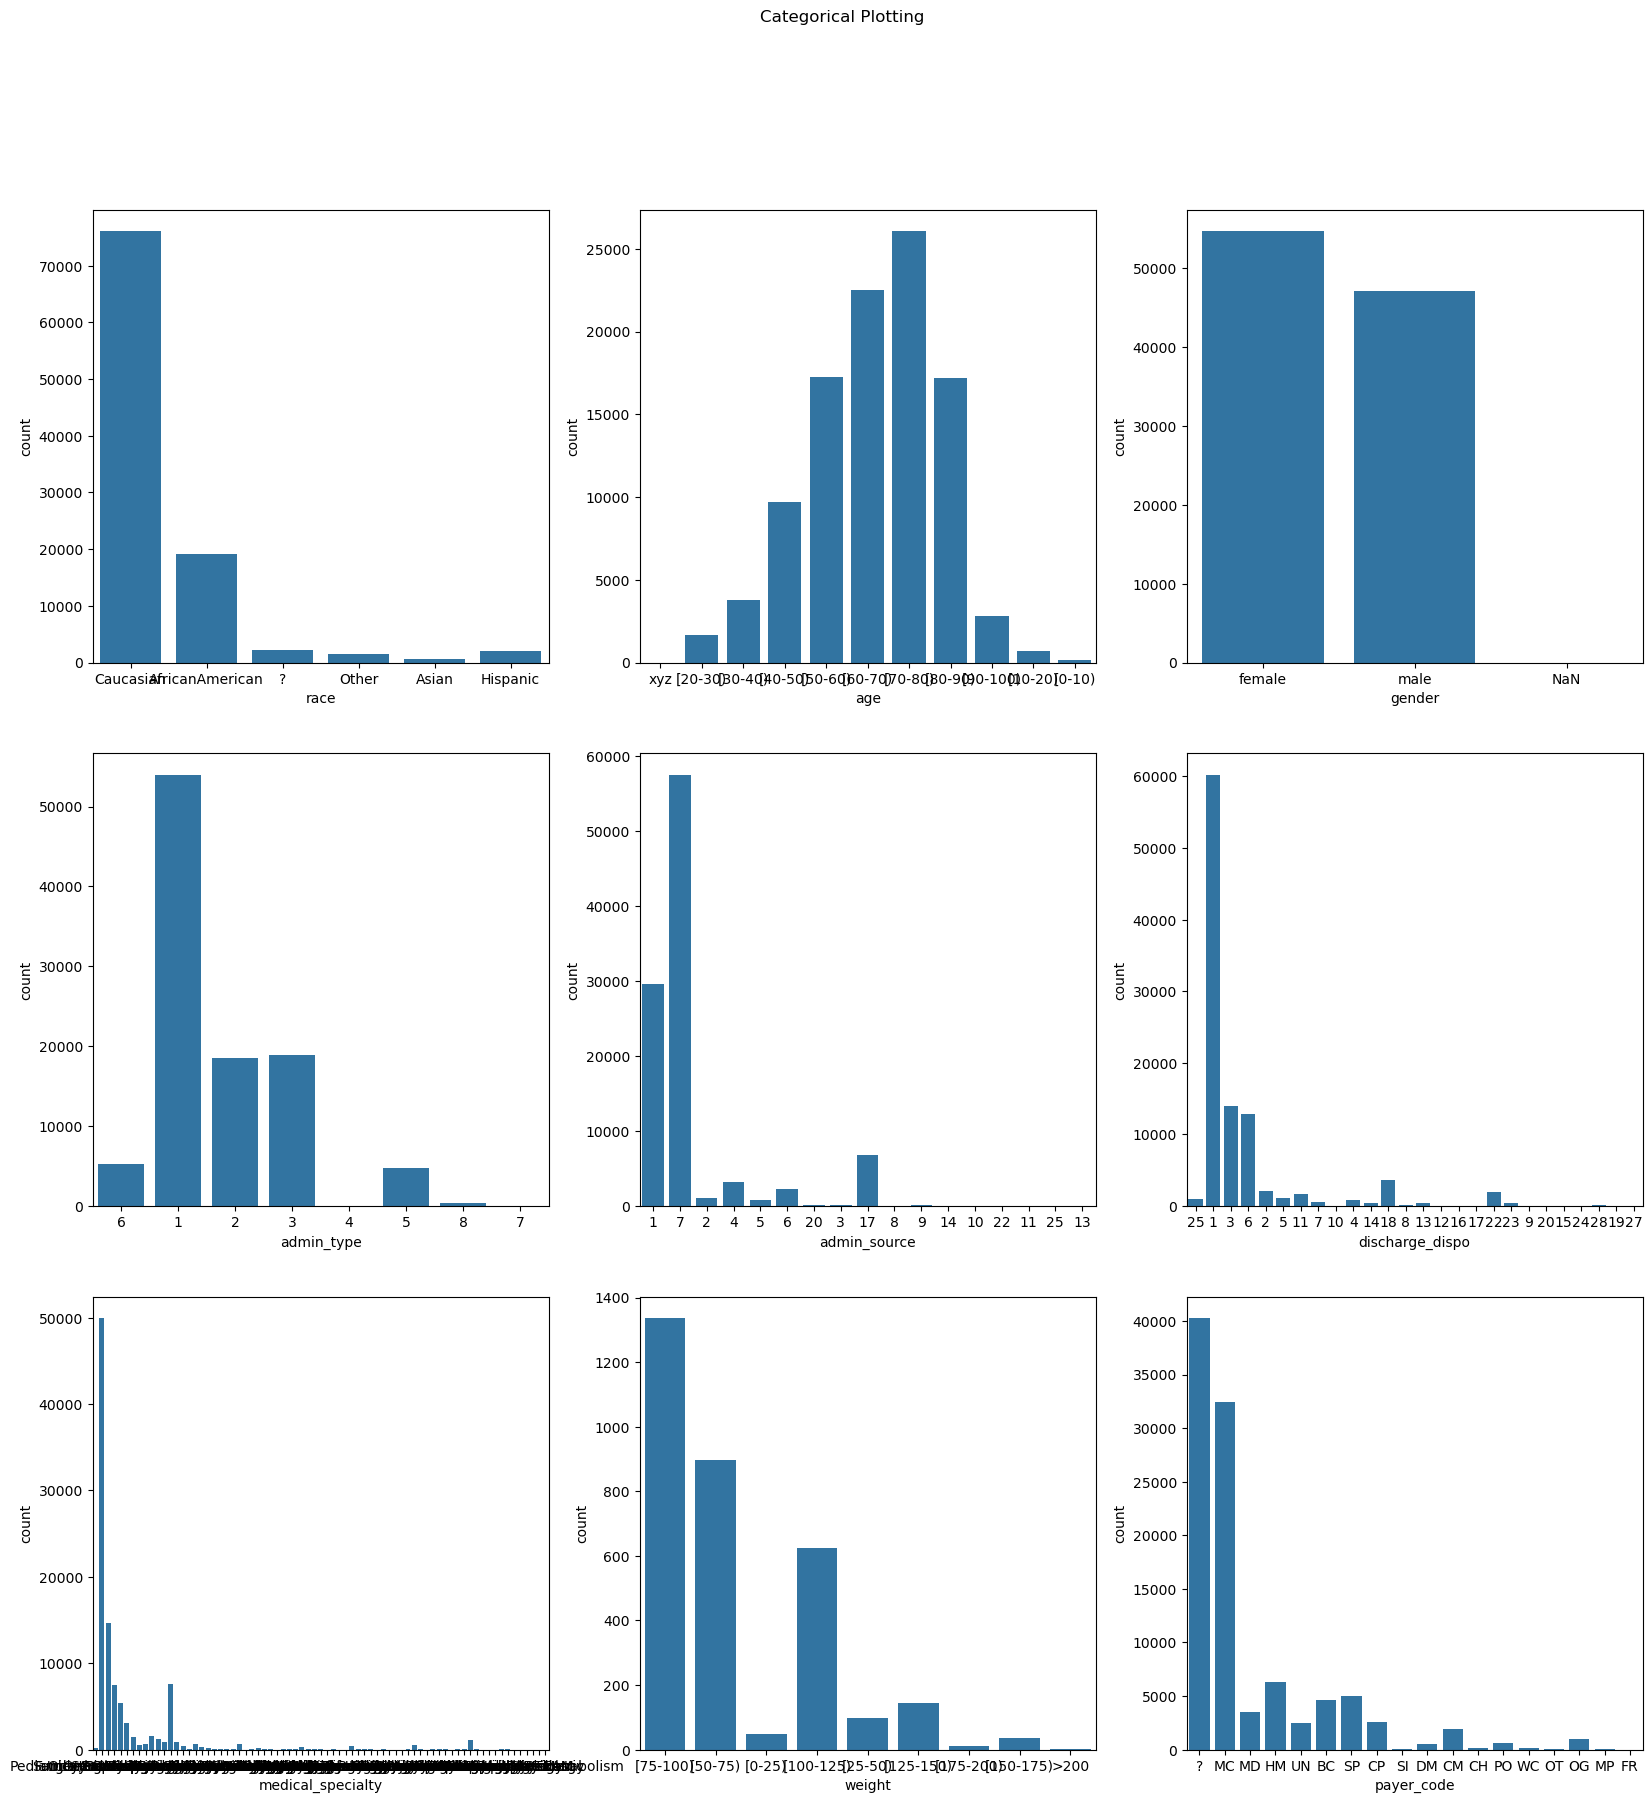

In [36]:
# Create a bar chart for each categorical variables to see the distribution of the data
plt.figure(figsize = (20,20))
plt.subplot(3,3,1)
sns.countplot(x="race", data=df)
plt.subplot(3,3,2)
sns.countplot(x="age", data=df)
plt.subplot(3,3,3)
sns.countplot(x="gender", data=df)
plt.subplot(3,3,4)
sns.countplot(x="admin_type", data=df)
plt.subplot(3,3,5)
sns.countplot(x="admin_source", data=df)
plt.subplot(3,3,6)
sns.countplot(x="discharge_dispo", data=df)
plt.subplot(3,3,7)
sns.countplot(x="medical_specialty", data=df)
plt.subplot(3,3,8)
sns.countplot(x="weight", data=df)
plt.subplot(3,3,9)
sns.countplot(x="payer_code", data=df)

plt.suptitle('Categorical Plotting')
plt.show()


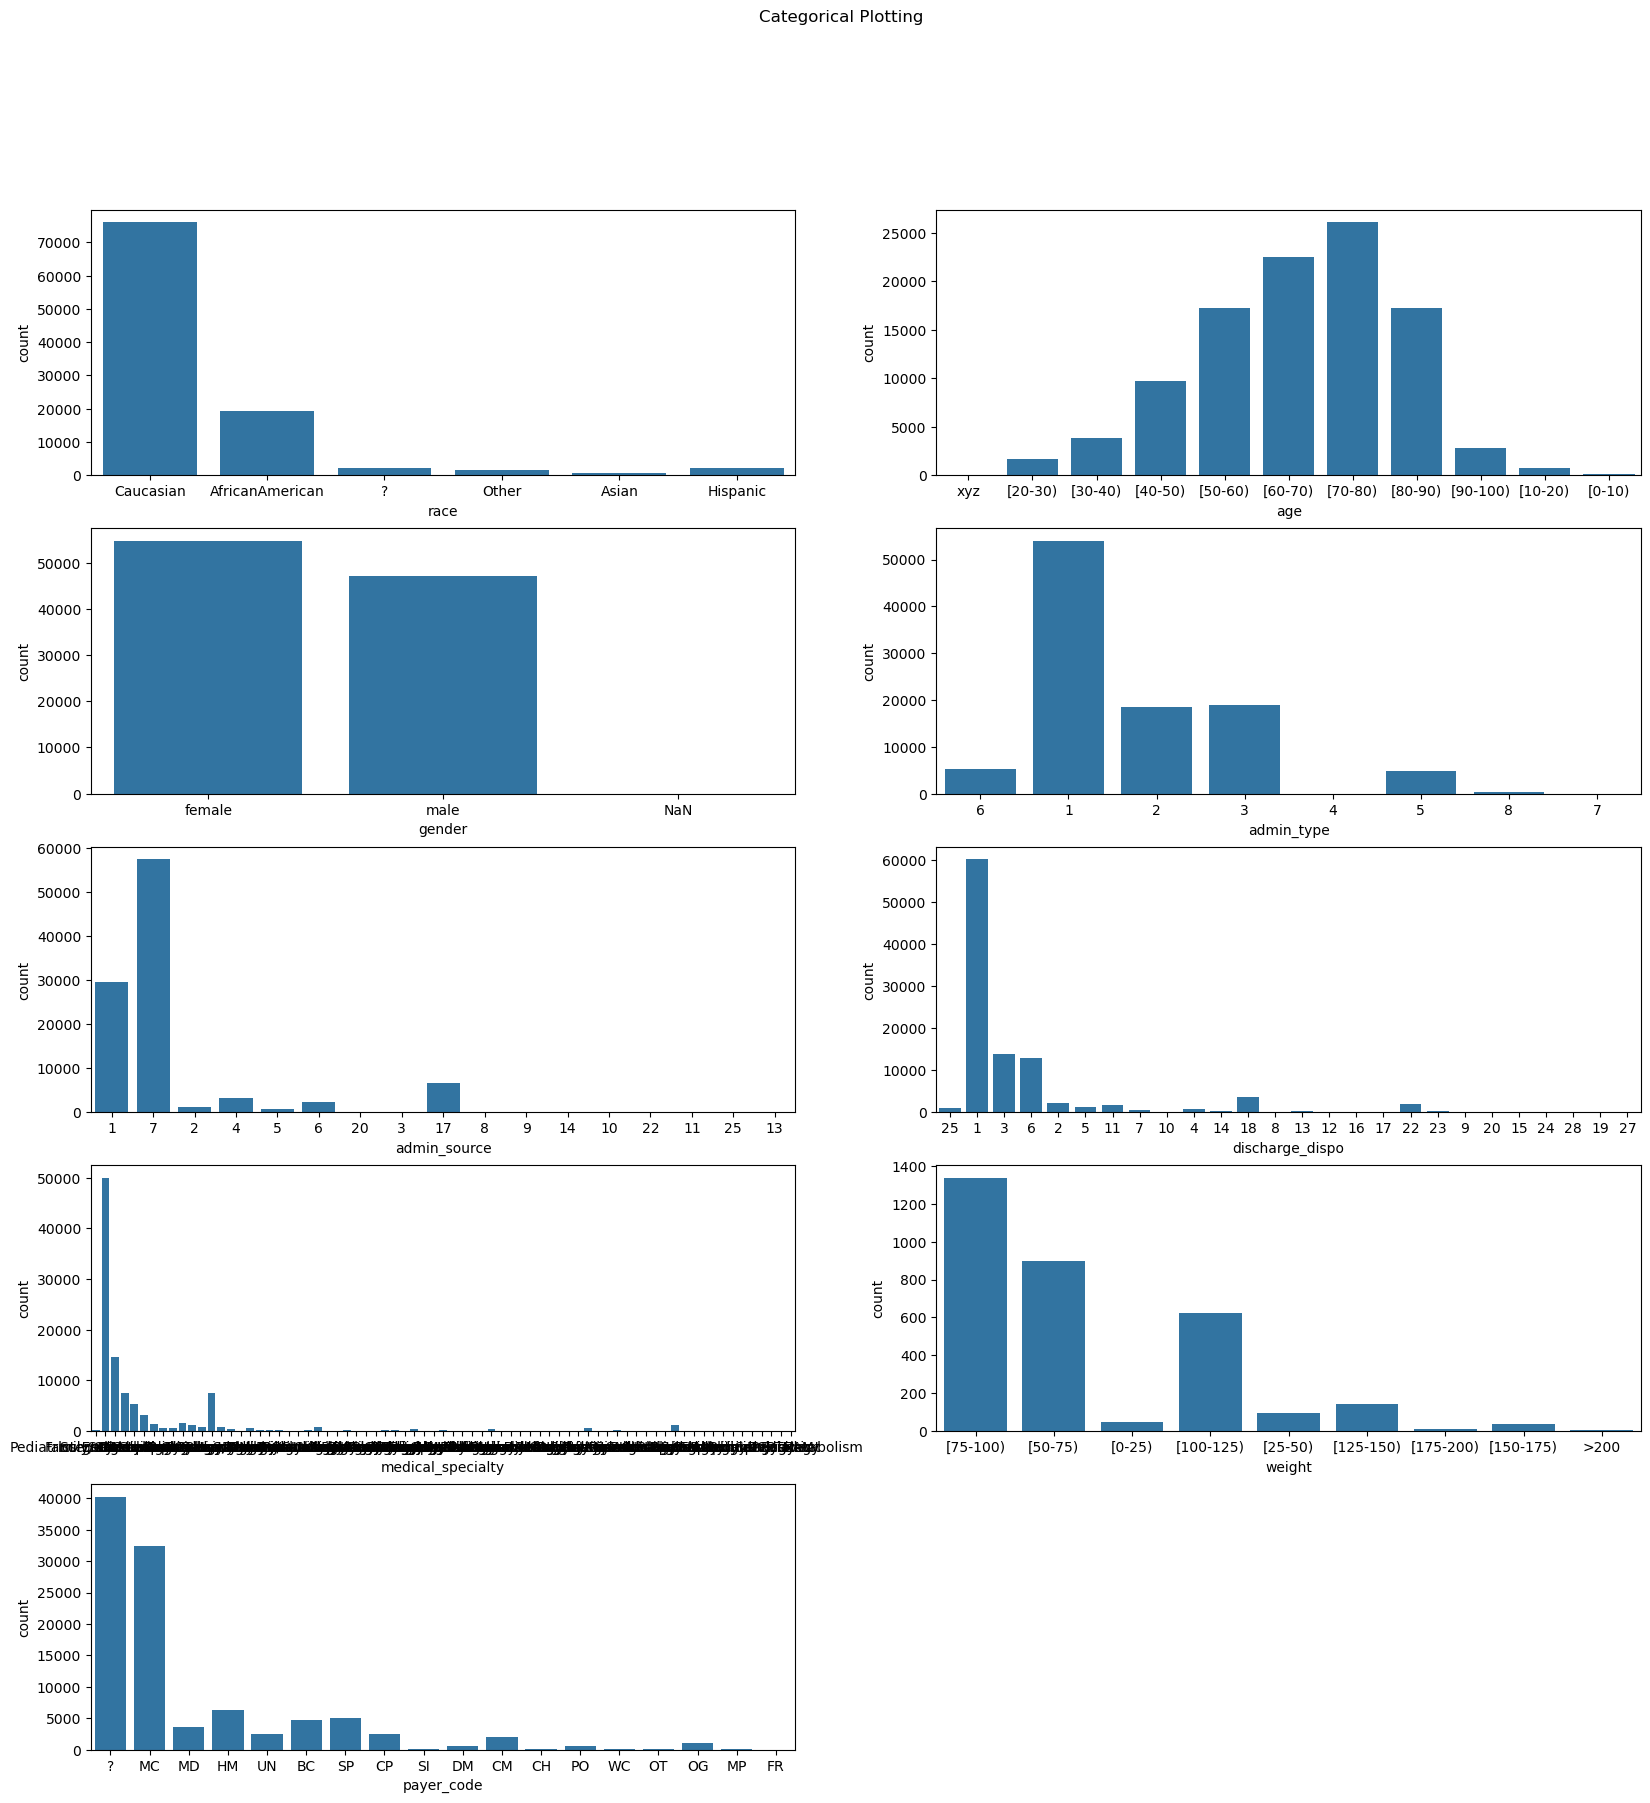

In [37]:
# Create a bar chart for each categorical variables to see the distribution of the data
plt.figure(figsize = (20,20))
plt.subplot(521)
sns.countplot(x="race", data=df)
plt.subplot(522)
sns.countplot(x="age", data=df)
plt.subplot(523)
sns.countplot(x="gender", data=df)
plt.subplot(524)
sns.countplot(x="admin_type", data=df)
plt.subplot(525)
sns.countplot(x="admin_source", data=df)
plt.subplot(526)
sns.countplot(x="discharge_dispo", data=df)
plt.subplot(527)
sns.countplot(x="medical_specialty", data=df)
plt.subplot(528)
sns.countplot(x="weight", data=df)
plt.subplot(529)
sns.countplot(x="payer_code", data=df)

plt.suptitle('Categorical Plotting')
plt.show()

### Examine categorical data a little more closely

In [38]:
for column in df.columns:         # df.columns is a data frame attribute
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")
    
    
# f means Formatted string literals 

encounter_id: Number of unique values 101766
patient_nbr: Number of unique values 71518
race: Number of unique values 6
gender: Number of unique values 3
age: Number of unique values 11
weight: Number of unique values 9
admin_type: Number of unique values 8
discharge_dispo: Number of unique values 26
admin_source: Number of unique values 17
time_in_hospital: Number of unique values 14
payer_code: Number of unique values 18
medical_specialty: Number of unique values 73
lab_procedures: Number of unique values 118
procedures: Number of unique values 7
num_medications: Number of unique values 76
number_outpatient: Number of unique values 39
number_emergency: Number of unique values 33
number_inpatient: Number of unique values 21
diag_1: Number of unique values 717
max_glu_serum: Number of unique values 3
A1Cresult: Number of unique values 3
metformin: Number of unique values 4
glimepiride: Number of unique values 4
glipizide: Number of unique values 4
glyburide: Number of unique values 4
t

In [39]:
object_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("====================================")

race : ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64
gender : ['female' 'male' 'NaN']
gender
female    54708
male      47057
NaN           1
Name: count, dtype: int64
age : ['xyz' nan '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)' '[70-80)'
 '[80-90)' '[90-100)' '[10-20)' '[0-10)']
age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       690
[0-10)        160
xyz             1
Name: count, dtype: int64
weight : [<NA> '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
weight
[75-100)     1336
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
Name: c

In [40]:
df['payer_code'].nunique()

18

In [41]:
df['payer_code'].value_counts()

payer_code
?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: count, dtype: int64

In [42]:
df.loc[df['payer_code']!= 'MC']

,encounter_id,patient_nbr,race,gender,age,weight,admin_type,discharge_dispo,admin_source,time_in_hospital,...,glipizide,glyburide,tolbutamide,miglitol,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,diabetesMed,readmitted
0,2278392,8222157,Caucasian,female,xyz,<NA>,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,female,NaN,<NA>,1,1,7,3,...,No,No,No,No,Up,No,No,No,Yes,>30
2,64410,86047875,AfricanAmerican,female,[20-30),<NA>,1,1,7,2,...,Steady,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,male,[30-40),<NA>,1,1,7,2,...,No,No,No,No,Up,No,No,No,Yes,NO
4,16680,42519267,Caucasian,male,[40-50),<NA>,1,1,7,1,...,Steady,No,No,No,Steady,No,No,No,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101755,443842022,188574944,Other,female,[40-50),<NA>,1,1,7,14,...,Steady,No,No,No,Up,No,No,No,Yes,>30
101756,443842070,140199494,Other,female,[60-70),<NA>,1,1,7,2,...,No,No,No,No,Steady,No,No,No,Yes,>30
101757,443842136,181593374,Caucasian,female,[70-80),<NA>,1,1,7,5,...,No,No,No,No,Steady,No,No,No,Yes,NO
101760,443847176,50375628,AfricanAmerican,female,[60-70),<NA>,1,1,7,6,...,No,No,No,No,Down,No,No,No,Yes,>30


In [43]:
df['medical_specialty'].nunique()

73

In [44]:
df['medical_specialty'].value_counts()

medical_specialty
?                                49949
InternalMedicine                 14635
Emergency/Trauma                  7565
Family/GeneralPractice            7440
Cardiology                        5352
                                 ...  
SportsMedicine                       1
Speech                               1
Perinatology                         1
Neurophysiology                      1
Pediatrics-InfectiousDiseases        1
Name: count, Length: 73, dtype: int64

In [45]:
df['weight'].nunique()

9

In [46]:
df['weight'].value_counts()

weight
[75-100)     1336
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
Name: count, dtype: int64

### Dropping columns and rows

In [47]:
df.shape

(101766, 33)

In [48]:
df.weight

0         <NA>
1         <NA>
2         <NA>
3         <NA>
4         <NA>
          ... 
101761    <NA>
101762    <NA>
101763    <NA>
101764    <NA>
101765    <NA>
Name: weight, Length: 101766, dtype: object

In [49]:
# Remove a single column
df.drop('payer_code',axis=1, inplace=True)  # Axis=1 means drop the column
df.drop('weight',axis=1, inplace=True)  


In [50]:
# Remove multiple columns

# glyburide-metformin       
# glipizide-metformin       
# glimepiride-pioglitazone

drop_columns = {'medical_specialty','glyburide-metformin','glipizide-metformin',
                'glimepiride-pioglitazone'}
df.drop(columns = drop_columns, inplace=True) # inplace=True not used so columns still exist. 
                                     # Just not in this instance.
df.head()

,encounter_id,patient_nbr,race,gender,age,admin_type,discharge_dispo,admin_source,time_in_hospital,lab_procedures,...,A1Cresult,metformin,glimepiride,glipizide,glyburide,tolbutamide,miglitol,insulin,diabetesMed,readmitted
0,2278392,8222157,Caucasian,female,xyz,6,25,1,1,41,...,NaN,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,female,NaN,1,1,7,3,59,...,NaN,No,No,No,No,No,No,Up,Yes,>30
2,64410,86047875,AfricanAmerican,female,[20-30),1,1,7,2,11,...,NaN,No,No,Steady,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,male,[30-40),1,1,7,2,44,...,NaN,No,No,No,No,No,No,Up,Yes,NO
4,16680,42519267,Caucasian,male,[40-50),1,1,7,1,51,...,NaN,No,No,Steady,No,No,No,Steady,Yes,NO


In [51]:
# Delete by selecting rows not equal to the condition
df = df.loc[df['age']!= 'xyz']
df = df.loc[df.gender != '?']
#df = df.loc[df['gender']!='?']
#df.shape

In [52]:
no_age = df[df['age'].isnull()].index
#no_age
df = df.drop(no_age, axis = 0)   # axis = 0 means drop the row
df.shape
               
              

(101764, 27)

#### Quantitative data

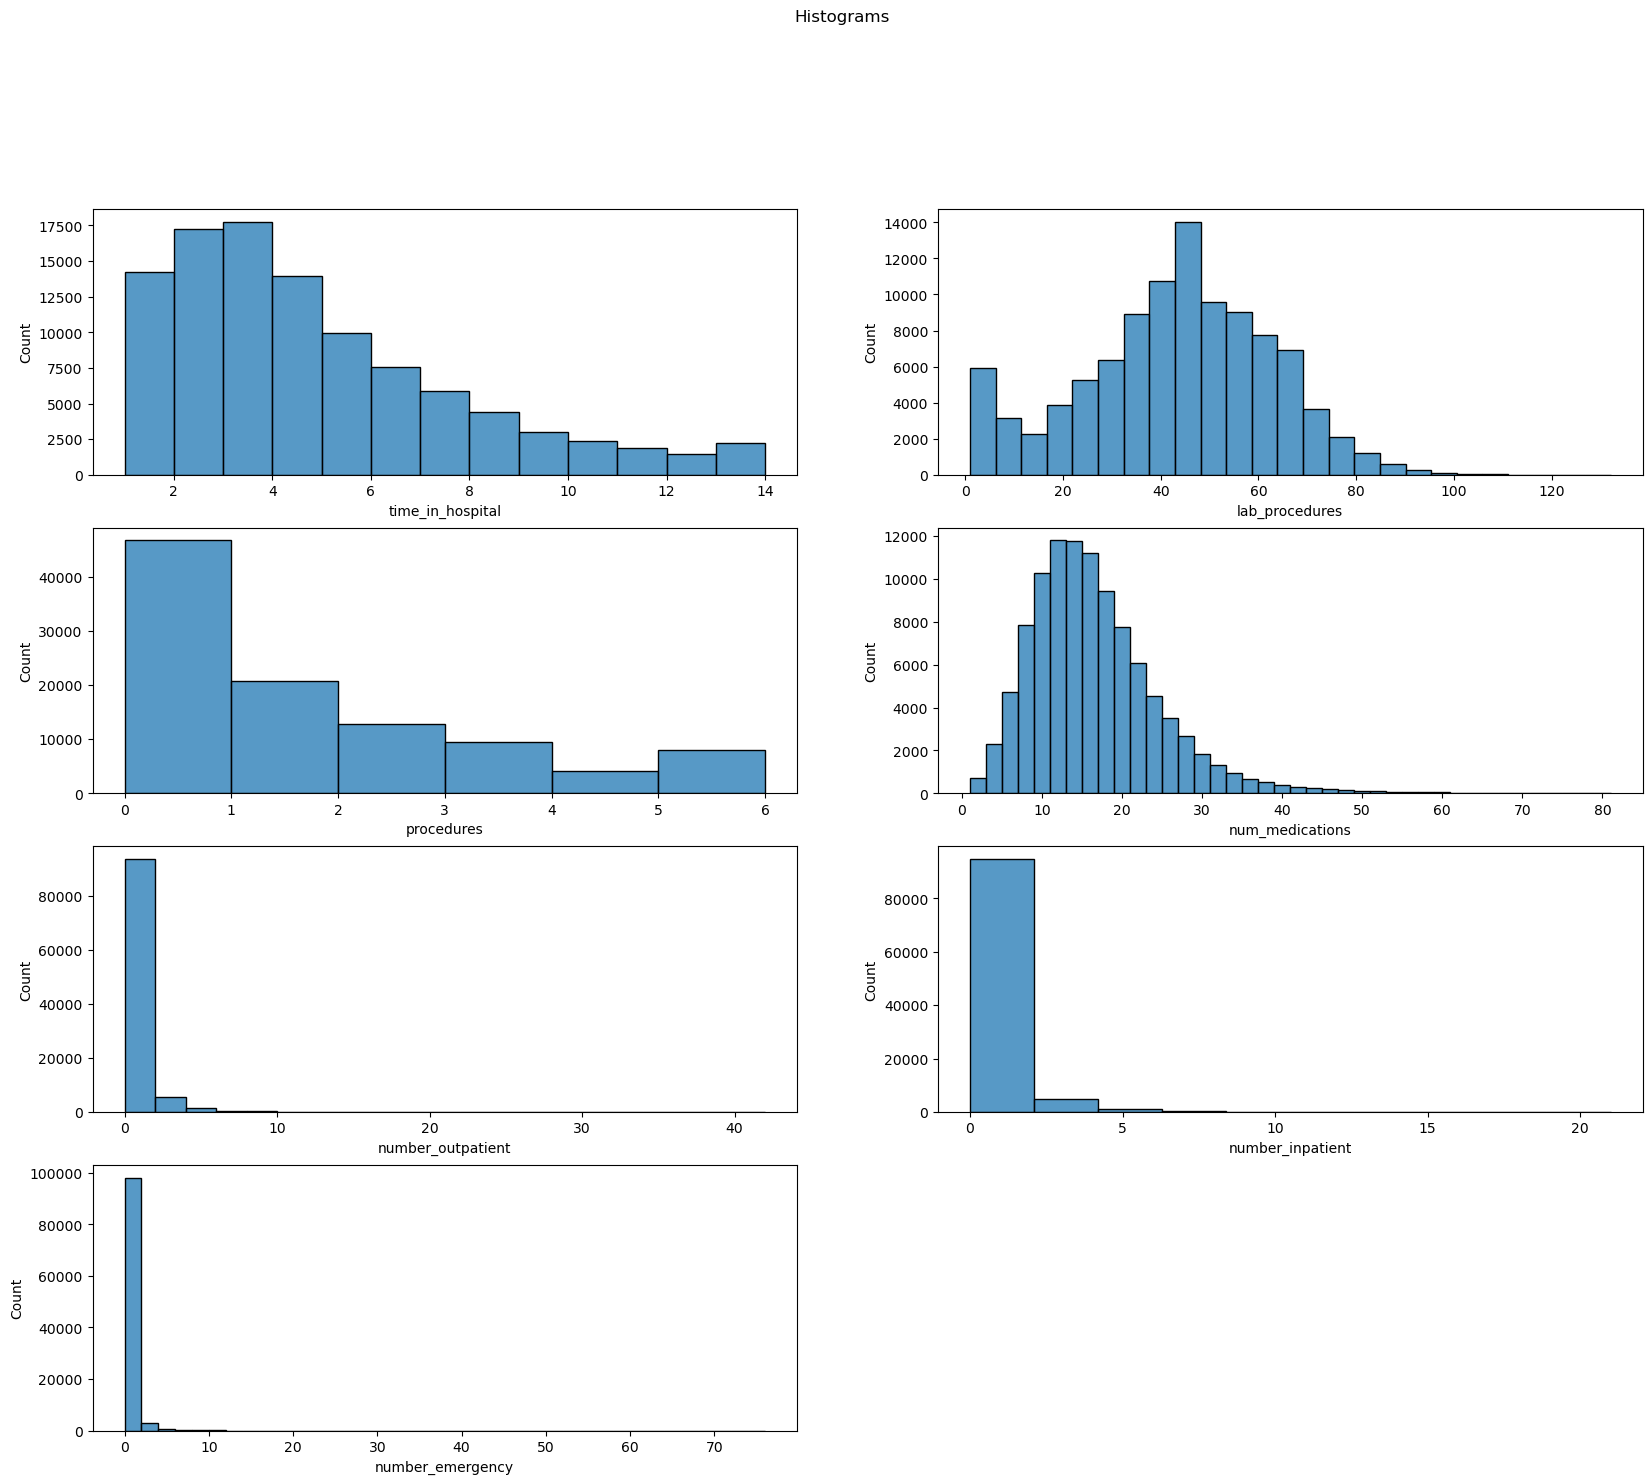

In [53]:
# Histograms

plt.figure(figsize = (20,20))
plt.subplot(521)
sns.histplot(data=df, x='time_in_hospital', binwidth = 1)
plt.subplot(522)
sns.histplot(data=df, x='lab_procedures', bins=25)
plt.subplot(523)
sns.histplot(data=df, x='procedures', binwidth = 1)
plt.subplot(524)
sns.histplot(data=df, x='num_medications', binwidth = 2)
plt.subplot(525)
sns.histplot(data=df, x='number_outpatient', binwidth = 2)
plt.subplot(526)
sns.histplot(data=df, x='number_inpatient', binwidth = 2)
plt.subplot(527)
sns.histplot(data=df, x='number_emergency', binwidth = 2)


plt.suptitle('Histograms')
plt.show()

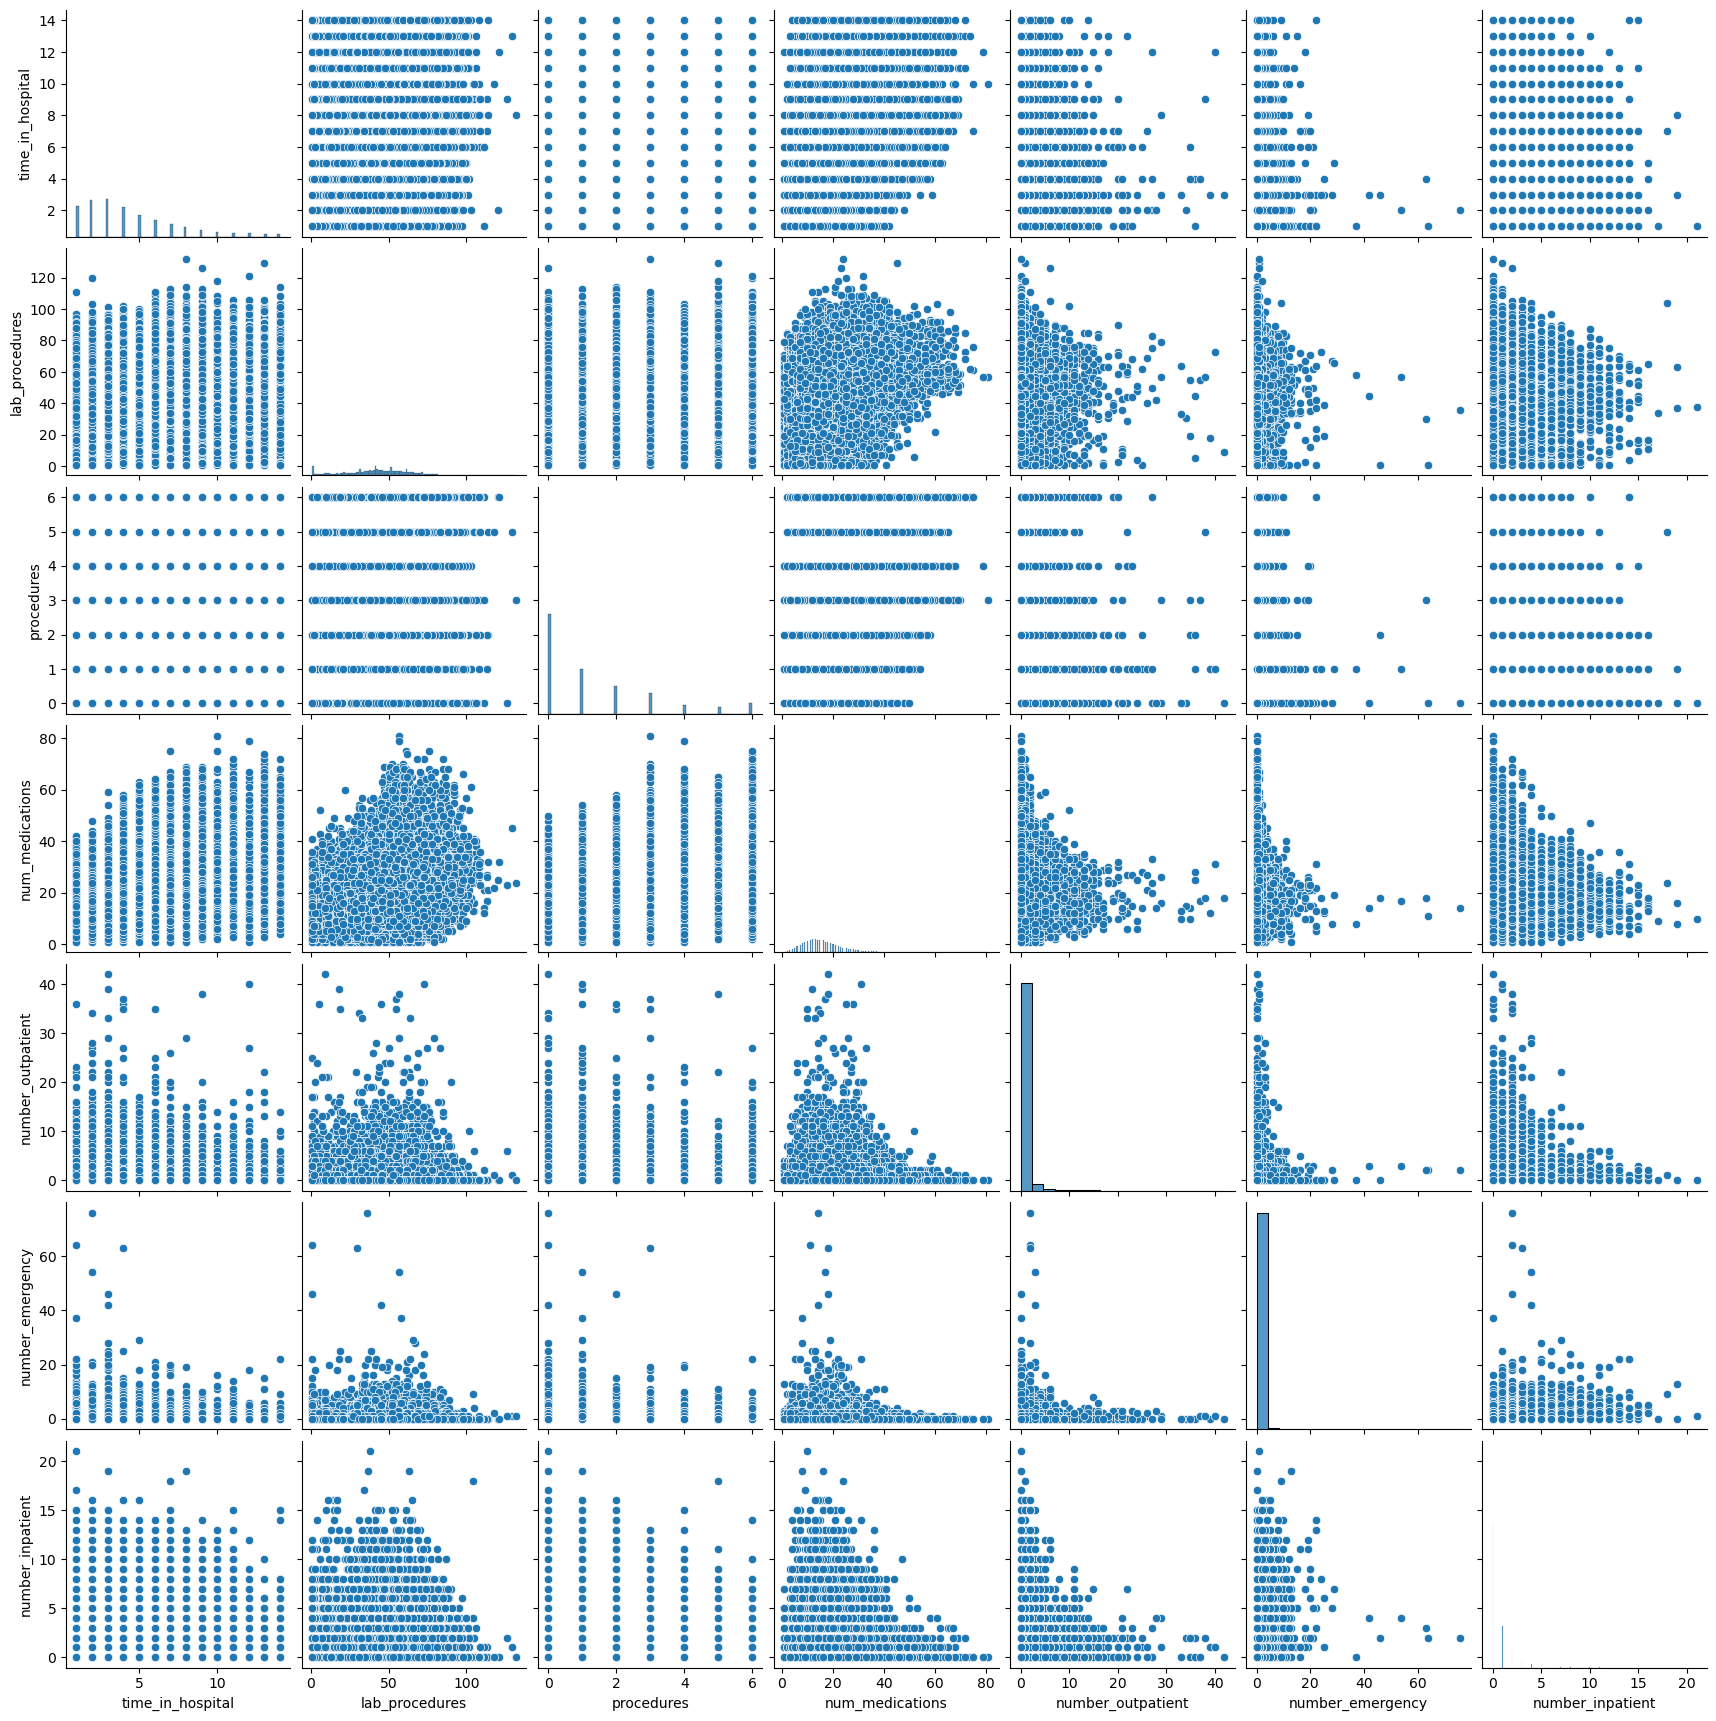

In [54]:
# Pairplot to see the big picture
sns.pairplot(df)

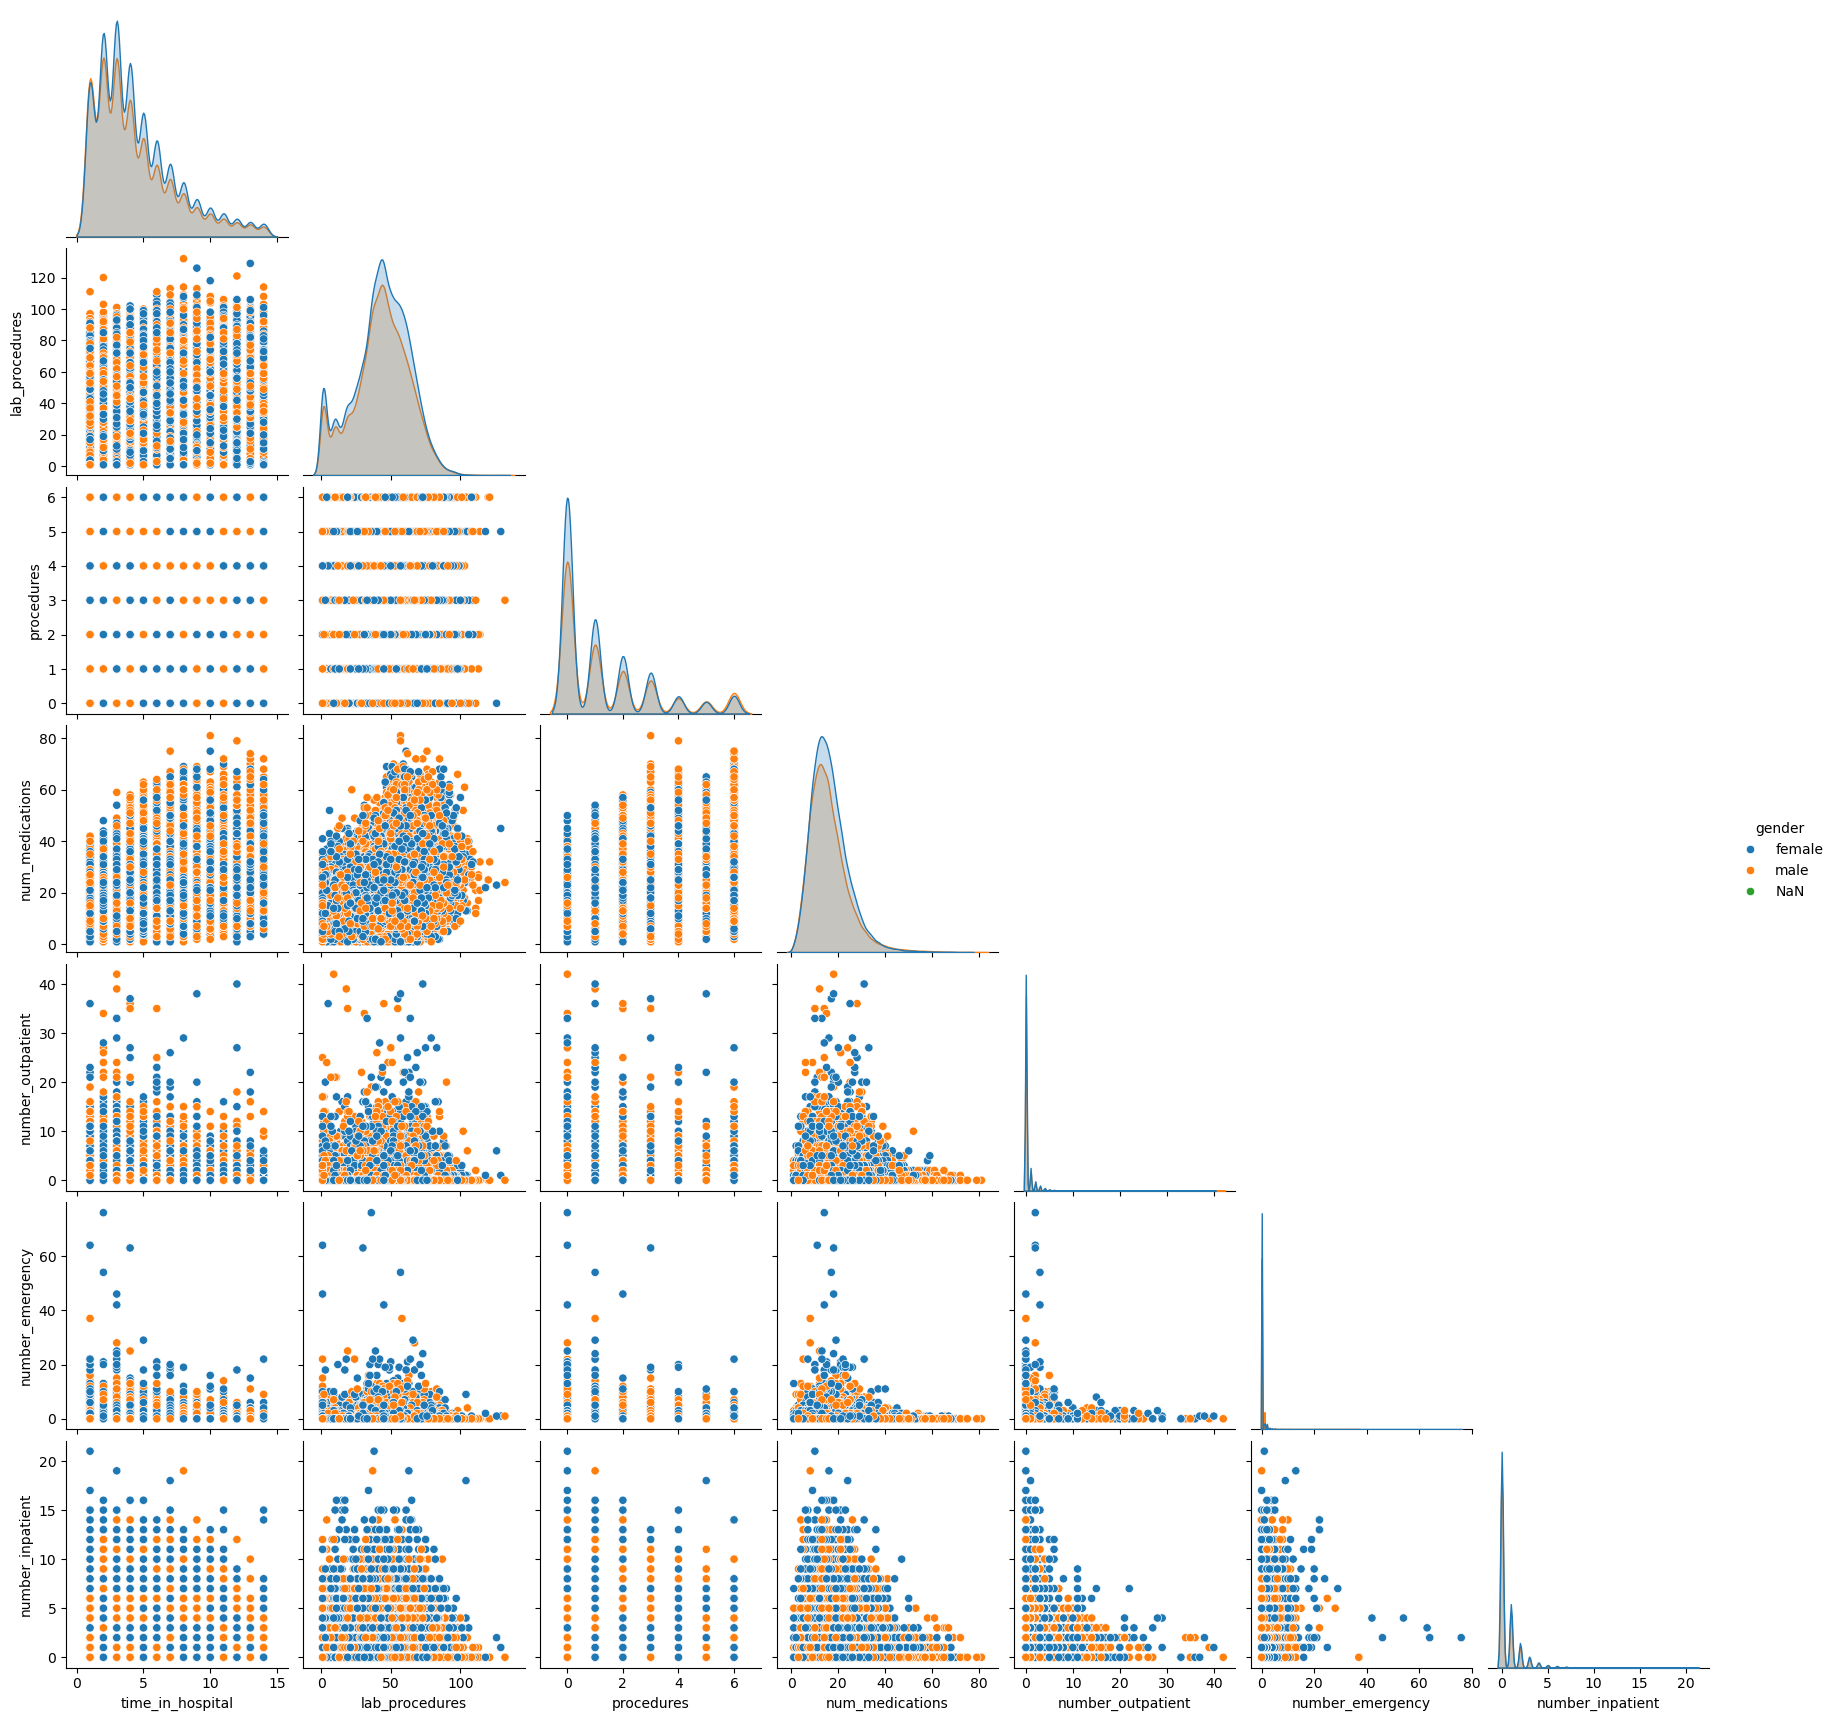

In [55]:
sns.pairplot(df, hue = 'gender', corner = True)

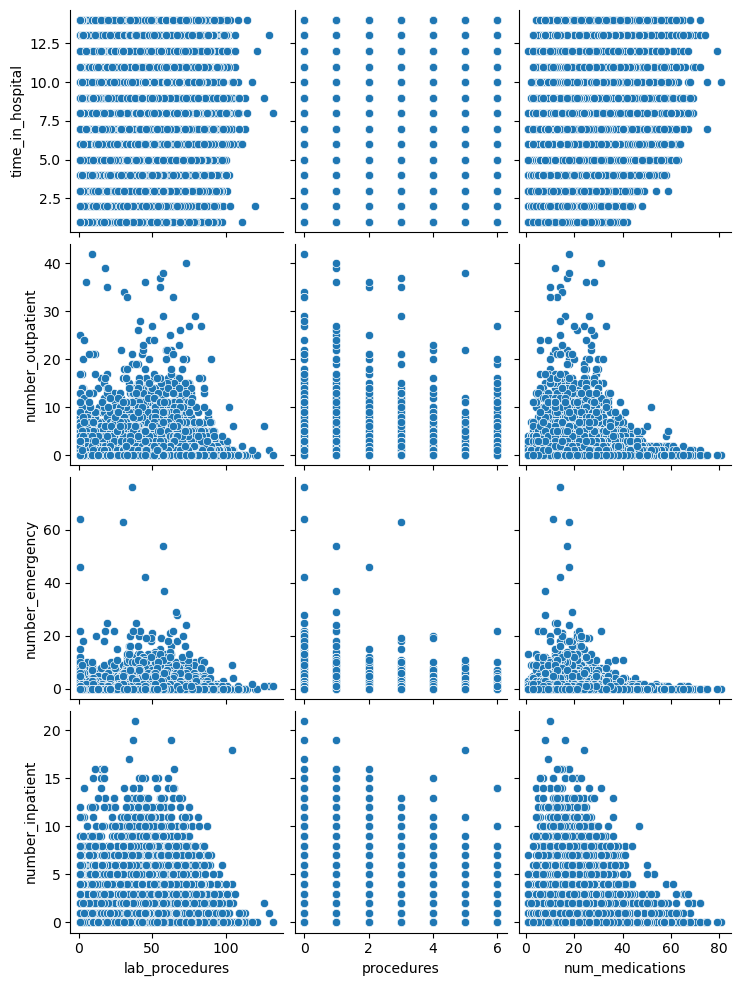

In [56]:
sns.pairplot(df,
             x_vars=['lab_procedures', 'procedures', 'num_medications'],
             y_vars=['time_in_hospital','number_outpatient','number_emergency','number_inpatient' ])


In [57]:
# Correlations
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
df2 = numeric_df.corr()
df2

,time_in_hospital,lab_procedures,procedures,num_medications,number_outpatient,number_emergency,number_inpatient
time_in_hospital,1.000000,0.318456,0.191462,0.466121,-0.008921,-0.009684,0.073615
lab_procedures,0.318456,1.000000,0.058072,0.268152,-0.007600,-0.002278,0.039235
procedures,0.191462,0.058072,1.000000,0.385765,-0.024823,-0.038183,-0.066244
num_medications,0.466121,0.268152,0.385765,1.000000,0.045189,0.013175,0.064180
number_outpatient,-0.008921,-0.007600,-0.024823,0.045189,1.000000,0.091458,0.107335
number_emergency,-0.009684,-0.002278,-0.038183,0.013175,0.091458,1.000000,0.266558
number_inpatient,0.073615,0.039235,-0.066244,0.064180,0.107335,0.266558,1.000000


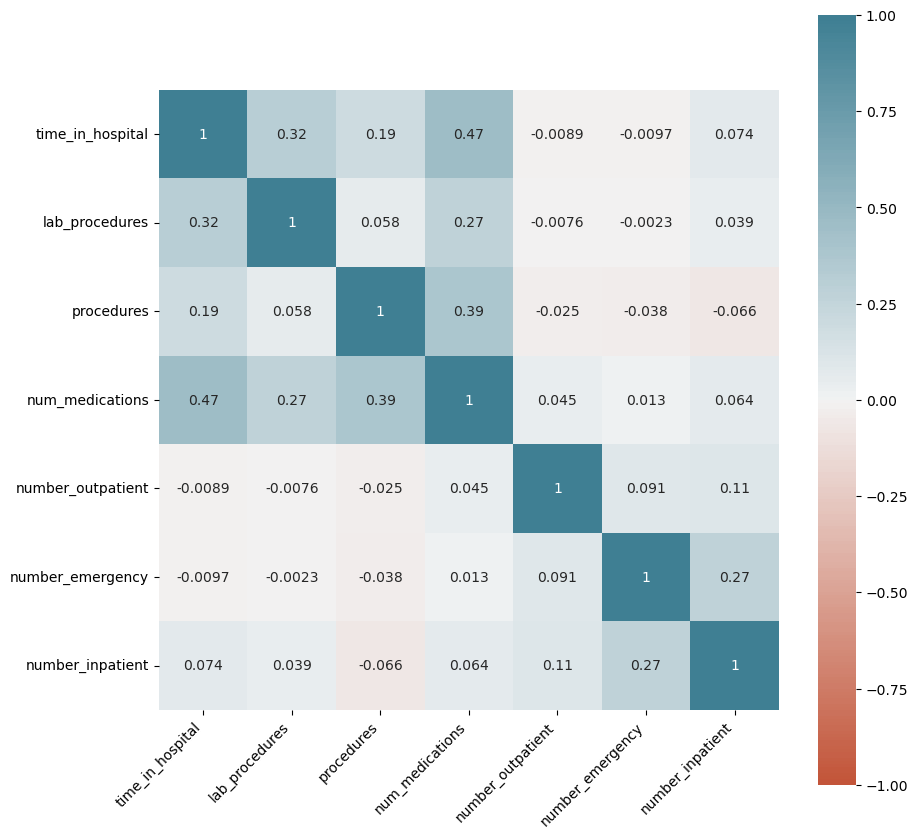

In [58]:
plt.figure(figsize=(10,10))
corr = df2.corr()
ax = sns.heatmap(
    df2,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True, annot_kws={"size":10}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')
plt.show()

<Axes: ylabel='num_medications'>

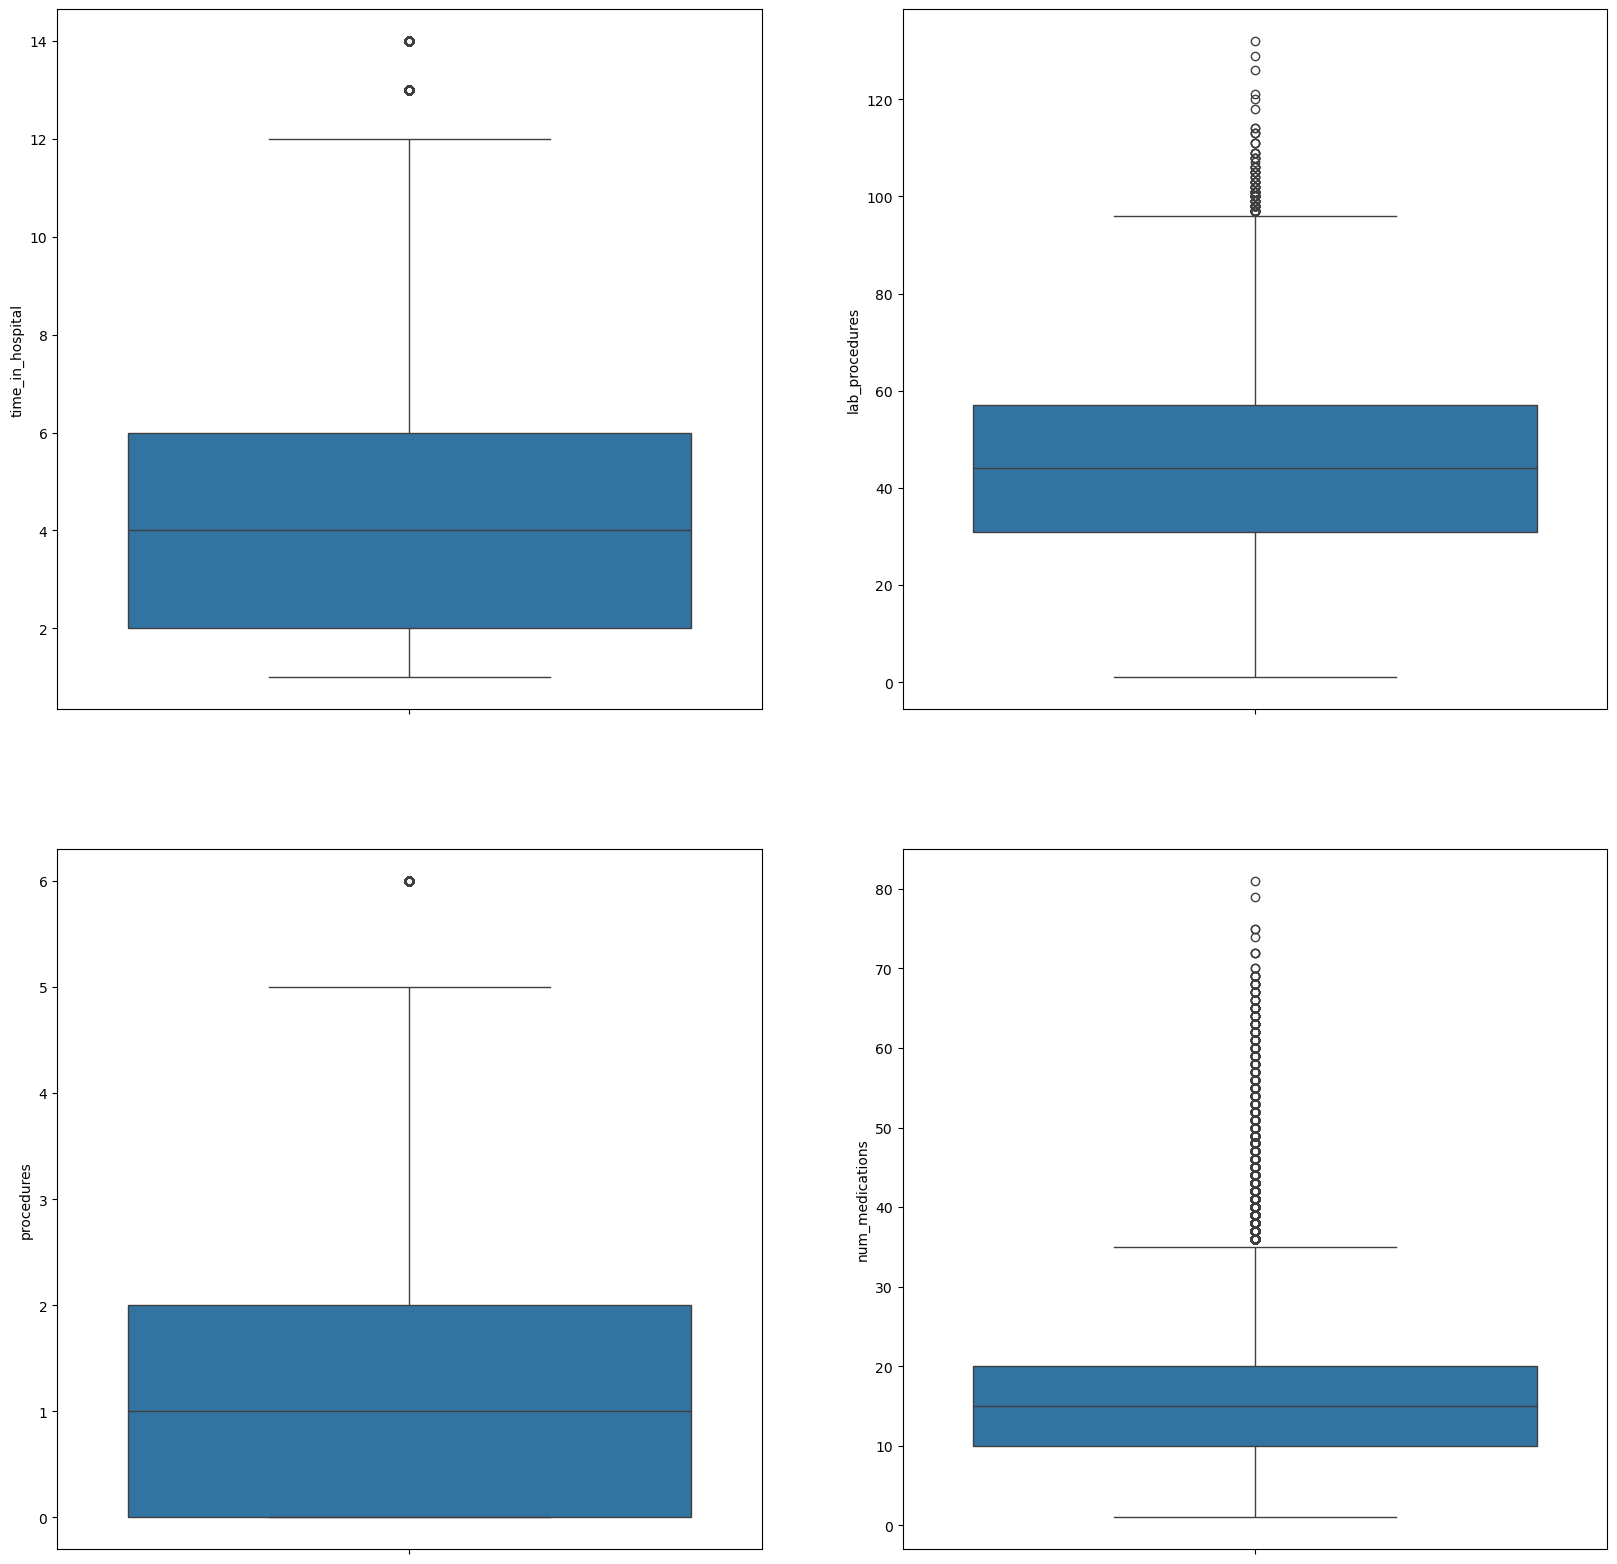

In [59]:
# Focusing on a few variables

plt.figure(figsize = (20,20))
plt.subplot(221)
sns.boxplot(data=df, y="time_in_hospital")
plt.subplot(222)
sns.boxplot(data=df, y="lab_procedures")
plt.subplot(223)
sns.boxplot(data=df, y="procedures")
plt.subplot(224)
sns.boxplot(data=df, y="num_medications")

<Axes: xlabel='age', ylabel='num_medications'>

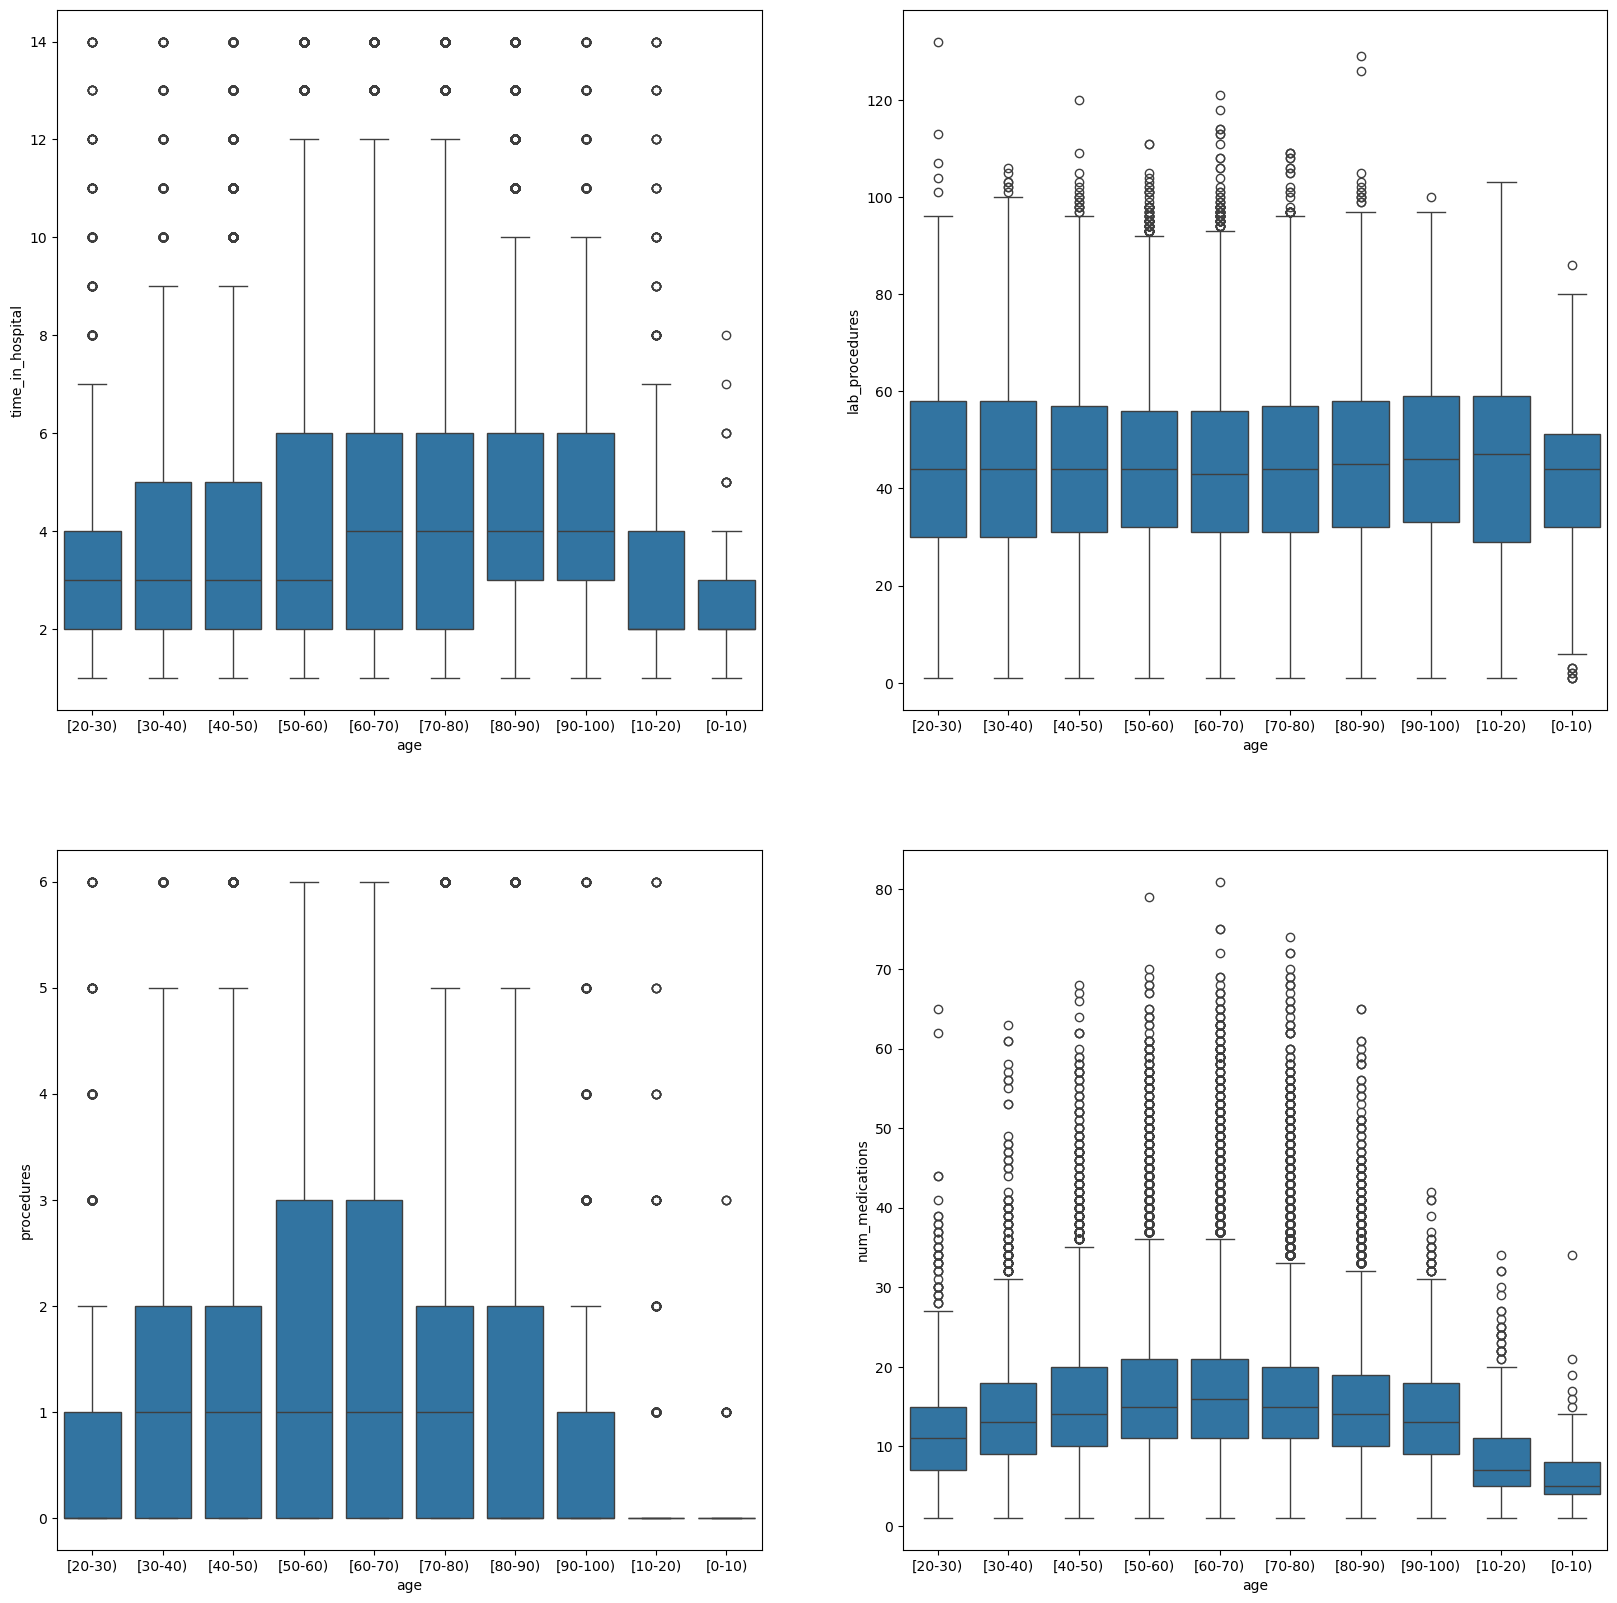

In [60]:
# Focusing on a few variables

plt.figure(figsize = (20,20))
plt.subplot(221)
sns.boxplot(data=df, x='age', y="time_in_hospital")
plt.subplot(222)
sns.boxplot(data=df, x='age', y="lab_procedures")
plt.subplot(223)
sns.boxplot(data=df, x='age', y="procedures")
plt.subplot(224)
sns.boxplot(data=df, x='age', y="num_medications")

### Removing outliers

In [61]:
#outliers
dfoutliers = df[(df['num_medications']>70)]
dfoutliers.shape
#filtering outliers out
#df_movie = df_movie[(df_movie['minute']>43) & (df_movie['minute']<158)]

(8, 27)

# Exercise - 30 minutes

### See Beer Notebook - Part 1